University of Helsinki, Master's Programme in Data Science  
DATA20047 Probabilistic Cognitive Modelling - Spring 2023  
Luigi Acerbi  

# Week 2 workshop: Bayesian inference with noisy measurements - Solutions

The goal of this workshop is to learn to perform inference within a simple Bayesian observer model with noisy sensory measurements.

## Reading material for this workshop

- Chapter 3 of \[**MKG22**\].
- Lecture notes (Week 2), found on Moodle.


## References

- \[**MKG22**\] Ma WJ, Körding K, and Goldreich D. "Bayesian Models of Perception and Action: An Introduction". MIT Press, 2022.
- *Acknowledgements*: Exercise 2.3 of this notebook is adapted from Problem 3.2 and Exercise 2.5 from Problem 3.7 of \[**MKG22**\].

-------------------

### Exercise 2.1: Generative model and joint distribution

> **Motivation:** The "generative model" is how we think the data (observations) are generated, so let's have a look at a simple synthetic scenario with continuous variables (we have seen many examples with discrete variables in Week 1). Remember that here the "observations" are what the observer measures internally (not what *we* experimenters see).


We consider here the *generative model* for the basic model of perception (see Section 2.2 and 2.2.1 of the lecture notes and Section 3.2 of \[**MKG22**\]). For example, $s$ can be the physical location of a sound played by speakers placed behind a wide screen, and $x$ the internal (noisy, imprecise) measurement of such location.

The *joint distribution* of $s$ and $x$ is
$$
p(s,x) = p(s) p(x|s).
$$
We can draw samples from this distribution by first drawing $s \sim p(s)$, and then $x \sim p(x|s)$ (*why?*).

- a) Plot a scatter plot of samples from $p(s,x)$ for $p(s) = \mathcal{N}(s| 0, 2^2)$ and $p(x|s) = \mathcal{N}\left(x| s, \sigma^2 \right)$ with $\sigma = 1$. Also make a separate (1D) histogram plot of $p(s)$ and $p(x)$.
- b) As before, but plot a scatter plot of samples from $p(s,x)$ for $p(s) = \text{Uniform}(-3,3)$. Also make a separate (1D) histogram plot of $p(s)$ and $p(x)$.
- c) In the scatter plots, what does $p(x|s)$ correspond to? What do you notice in the histogram plots?

#### Exercise 2.1 Answers

We can draw samples from $p(s,x)$ by first drawing $s \sim p(s)$, and then $x \sim p(x|s)$ due to basic rules of probability and graphical models: first sample from the root node, then proceed downstream, a method known as *ancestral sampling*. Check the basic recap of probability theory if needed.

- a) See code below.
- b) See code below.
- c) $p(x|s)$ corresponds to a vertical slice of the scatter plot (the conditional distribution of $x$ for a fixed $s$). In the histogram plots, we see that (as expected) the distribution of $x$ is wider and smoother than $s$, being a noisy/corrupted version of the stimulus (this is particularly visible when $s$ is uniformly distributed).

a)


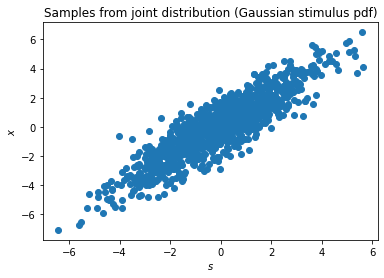

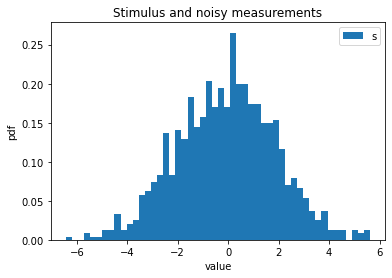

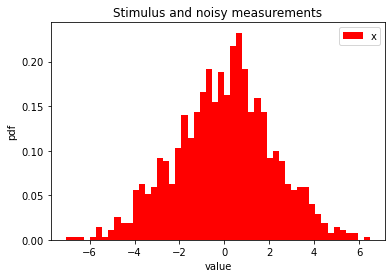


b)


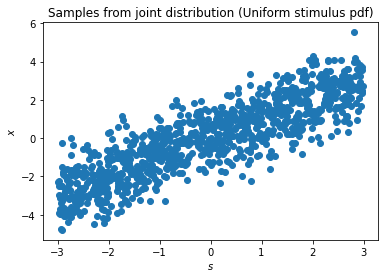

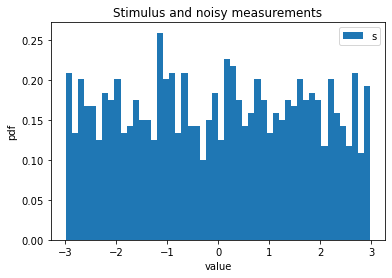

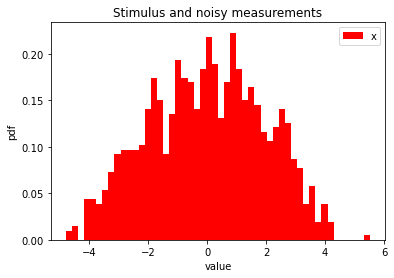

In [1]:
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt

sigma = 1.
N = int(1e3)

print('a)') # First part is provided here already

sigma_s = 2.
s = npr.normal(loc=0., scale=sigma_s, size=N)
x = npr.normal(loc=s, scale=sigma, size=N)
# We could also write this as
# x = s + npr.normal(0, scale=sigma, size=N) # Why?

plt.scatter(s, x)
plt.xlabel(r'$s$')
plt.ylabel(r'$x$')
plt.title(r'Samples from joint distribution (Gaussian stimulus pdf)')
plt.show()

plt.hist(s, density=True, bins=50, label='s')
plt.xlabel(r'value')
plt.ylabel(r'pdf')
plt.title(r'Stimulus and noisy measurements')
plt.legend()
plt.show()

plt.hist(x, density=True, bins=50, label='x', color='r')
plt.xlabel(r'value')
plt.ylabel(r'pdf')
plt.title(r'Stimulus and noisy measurements')
plt.legend()
plt.show()


####################################################

print()
print('b)') # Your turn!
a = -3.
b = 3.
s = npr.uniform(a, b, size=N)
x = npr.normal(loc=s, scale=sigma, size=N)

plt.scatter(s, x)
plt.xlabel(r'$s$')
plt.ylabel(r'$x$')
plt.title(r'Samples from joint distribution (Uniform stimulus pdf)')
plt.show()

plt.hist(s, density=True, bins=50, label='s')
plt.xlabel(r'value')
plt.ylabel(r'pdf')
plt.title(r'Stimulus and noisy measurements')
plt.legend()
plt.show()

plt.hist(x, density=True, bins=50, label='x', color='r')
plt.xlabel(r'value')
plt.ylabel(r'pdf')
plt.title(r'Stimulus and noisy measurements')
plt.legend()
plt.show()


### Exercise 2.2: Posterior for Gaussian prior and likelihood

> **Motivation:** Time to do Bayesian inference with Gaussian distributions, based on what we learnt in Week 1. Gaussian priors (and Gaussian measurement distributions) are incredibly common assumptions in Bayesian observer modelling.

We consider now the *inference step* for the basic model of perception (see Section 2.2.2 of the lecture notes, and Section 3.3 of \[**MKG22**\]). As an example, consider a *sound localization* task, in which the observer has to estimate the location of a sound source. During the experiment, sounds are played at different locations, with probabiltiy following a Gaussian distribution $p(s)$. We also assume that the noisy measurement distribution $p(x|s)$ is also Gaussian.

*Note*: We saw previously that if both the prior and likelihood are Gaussian, the posterior is Gaussian.

- a) Assuming the prior is $p(s_\text{hyp}) = \mathcal{N}(s_\text{hyp}| \mu_\text{s}, \sigma^2_s)$ and the measurement distribution is $p(x_\text{obs}|s_\text{hyp}) = \mathcal{N}(x_\text{obs}| s_\text{hyp}, \sigma^2)$, compute the posterior analytically using the fundamental Gaussian identity (Eq. 2.2) in the lecture notes. Check that you get the same results as in Section 3.3.3 of [**MKG22**].
- b) Plot in the same graph the prior, the likelihood and the posterior for $\mu_\text{s} = 0$, $\sigma_s = 2$, $\sigma = 1$, and $x_\text{obs} = 5$. *Hint:* You can use `scipy.stats.norm.pdf` to evaluate the pdf of the normal distribution.
- c) Repeat the same plot for different values of $x_\text{obs}$. What do you observe?

#### Exercise 2.2 Answers

- a) First, let's write Bayes rule for the given prior and likelihood function:
$$p(s_\text{hyp} | x_\text{obs}) = \frac{\mathcal{N}(s_\text{hyp}| \mu_\text{s}, \sigma^2_s) \mathcal{N}(x_\text{obs}| s_\text{hyp}, \sigma^2)}{\int \mathcal{N}(s_\text{hyp}| \mu_\text{s}, \sigma^2_s) \mathcal{N}(x_\text{obs}| s_\text{hyp}, \sigma^2) d s_\text{hyp}}$$
Note that we can swap the argument and mean parameter for a Gaussian (*why?*):
$$
\mathcal{N}(x_\text{obs}| s_\text{hyp}, \sigma^2) = \mathcal{N}(s_\text{hyp}| x_\text{obs}, \sigma^2)
$$
So, using the fundamental Gaussian identity we have:
$$\mathcal{N}(s_\text{hyp}| \mu_\text{s}, \sigma^2_s) \mathcal{N}(s_\text{hyp}| x_\text{obs}, \sigma^2) = 
\mathcal{N}\left(x_\text{obs} | \mu_\text{s}, \sigma^2 + \sigma^2_s \right) \mathcal{N}\left(s_\text{hyp} | \frac{x_\text{obs} \sigma_s^2 + \mu_s \sigma^2}{\sigma^2 + \sigma_s^2}, \frac{\sigma^2 \sigma_s^2}{\sigma^2 + \sigma_s^2} \right) $$
Plugging this into the posterior above, the normalization constant cancels out, the denominator integrates to 1, and we are left with:
$$ p(s_\text{hyp} | x_\text{obs}) = \mathcal{N}\left(s_\text{hyp} | \frac{x_\text{obs} \sigma_s^2 + \mu_s \sigma^2}{\sigma^2 + \sigma_s^2}, \frac{\sigma^2 \sigma_s^2}{\sigma^2 + \sigma_s^2} \right).$$
- b) See code below.
- c) The posterior is always "in-between" the prior and likelihood; with the mean of the posterior being a weighted linear combination of the two (see [**MKG22**]). The variance of the posterior does not depend on $x_\text{obs}$, and it's smaller than the variance of the prior or likelihood alone. Admittedly, these remarks do not strictly require plotting, as they stem directly from the equation from the posterior we obtained above. Still, it's often a good idea to plot things to build further intuition for how things look. (*Are these general features of Bayesian inference?*)

a)
mu_post: 4.0
sigma_post: 0.8944271909999159

b)


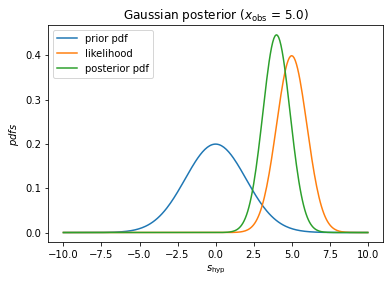


c)


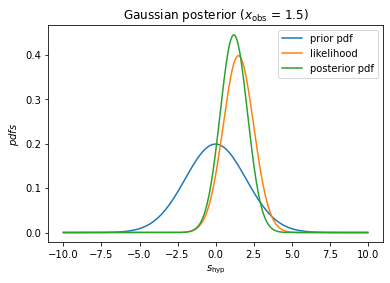

In [2]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt


print('a)')

def gaussian_posterior(mu_s, sigma_s, sigma, x_obs):
    """Compute posterior mean and standard deviation given prior mean/std, measurement noise and observation."""
    mu_post = (mu_s*sigma**2 + x_obs*sigma_s**2) / (sigma**2 + sigma_s**2)
    sigma_post = sigma * sigma_s / np.sqrt(sigma**2 + sigma_s**2)
    return mu_post, sigma_post

mu_post, sigma_post = gaussian_posterior(mu_s=0., sigma_s=2., sigma=1., x_obs=5.)

print('mu_post: {}'.format(mu_post))
print('sigma_post: {}'.format(sigma_post))

####################################################

print()
print('b)')

mu_s = 0.
sigma_s = 2.
sigma = 1.
x_obs = 5.

def gaussian_posterior_plot(x_obs, mu_s, sigma_s, sigma, N=int(2**8+1)):
    """Plot Gaussian posterior for a given Gaussian prior and likelihood."""
    
    # Define grid for plotting - ensure to cover the entirety of the prior (e.g., mean +/- 5 standard deviations)
    lb = mu_s - 5*sigma_s # lower bound for the grid
    ub = mu_s + 5*sigma_s # upper bound
    s_grid = np.linspace(lb, ub, N)
    mu_post, sigma_post = gaussian_posterior(mu_s, sigma_s, sigma, x_obs)
        
    prior_pdf = sps.norm.pdf(s_grid, mu_s, sigma_s)
    likelihood = sps.norm.pdf(x_obs, s_grid, sigma)
    posterior_pdf = sps.norm.pdf(s_grid, mu_post, sigma_post)
    
    plt.plot(s_grid, prior_pdf, label='prior pdf')
    plt.plot(s_grid, likelihood, label='likelihood')
    plt.plot(s_grid, posterior_pdf, label='posterior pdf')

    plt.xlabel(r'$s_\mathrm{hyp}$')
    plt.ylabel(r'$pdfs$')
    plt.title(r'Gaussian posterior ($x_\mathrm{obs}$ = ' + str(x_obs) + ')')

    plt.legend()
    plt.show()
    
gaussian_posterior_plot(x_obs, mu_s, sigma_s, sigma)

####################################################

print()
print('c)')

gaussian_posterior_plot(1.5, mu_s, sigma_s, sigma)

### Exercise 2.3: Numerical evaluation of the posterior

> **Motivation:** For many Bayesian observer models we cannot compute the Bayesian posterior analytically, but we can do it numerically, as we will explore in this exercise. For now, we still use Gaussian distributions so that we can compare our results with the analytical ones. We will reuse methods we saw in the workshop of Week 1.


For a fixed $x_\text{obs}$ and a given prior $p(s)$ and likelihood $p(x_\text{obs}|s)$ we can numerically compute the posterior as follows:

- Define a grid `s_grid` of hypothesized stimulus values, e.g. using `numpy.linspace`.
  - The grid needs to be wide enough to cover the prior plus the measurement with virtually no loss of probability mass (typically, $\pm 5$ standard deviations is often enough - although be careful to check).
  - Ensure that the grid is fine enough such that the discretization has small influence on future computations. This means that the grid spacing `ds` needs to be *small* compared to all the other quantities involved (thus, the number of grid points $N$ needs to be large; $N > 500$ often works, although smaller grids can be enough sometimes).
- Evaluate the prior $p(s_\text{hyp})$ and likelihood function $p(x_\text{obs}|s_\text{hyp})$ on the grid.
- Multiply them elementwise to yield the joint distribution or "*protoposterior*" (the name coined in the [**MKG22**] book).
- Integrate the protoposterior to obtain the normalization constant. *Hint:* You can use numerical integration functions from `scipy.integrate`, which you can find [here](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). Look at the functions that take fixed samples, such as `scipy.integrate.romb` or `scipy.integrate.trapezoid`.
- Divide the protoposterior by the normalization constant.

-------------------------

- a) Using the instructions above, numerically compute the posterior for a Gaussian prior $p(s) = \mathcal{N}(s; 0, 2^2)$ and Gaussian likelihood with $\sigma = 1$ and $x_\text{obs} = 5$. Plot in the same graph the prior, the likelihood, and the posterior.
- b) Compare the numerical posterior with the analytical posterior obtained in Exercise 2.2 (for example, by plotting them on the same graph).
- c) Compute the mode, mean and standard deviation of the numerical posterior, using the standard formulas and numerical integration:
$$\text{Mode}[f] = \arg\max_s f(s);  \qquad \text{Mean}[f] = \int s f(s) ds; \qquad \text{Std}[f] = \sqrt{\int s^2 f(s) ds - \text{Mean}[f]^2}.$$
Compare them with the analytical values.
- d) What happens if you use a smaller and smaller number of grid points $N$ for the computation of the posterior?

*Note*: The mode of the posterior is also known as the *maximum-a-posteriori* (MAP) estimate.

#### Exercise 2.3 Answers

- a) See code below.
- b) See below. The two posteriors match very well as we can see from the very small RMSE (root mean squared error).
- c) See below. Note that for a Gaussian distribution, we expect the mode to be equal to the mean.
- d) For smaller $N$, the approximation starts degrading and the numerical posterior deviates more and more from the true one.

a)


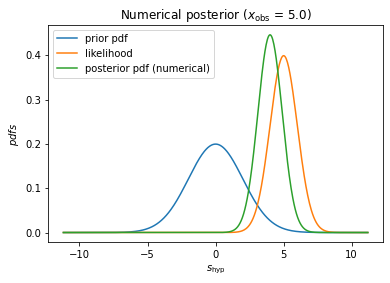


b)


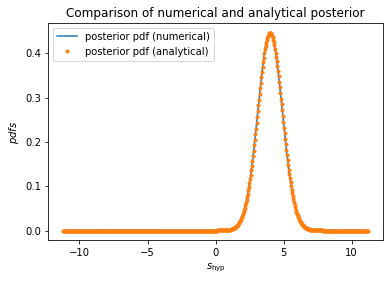

RMSE (root mean squared error) between numerical and analytical posterior: 5.00100277409906e-13

c)
Posterior mode. Numerical: 4.017934647069934. Analytical: 4.0.
Posterior mean. Numerical: 3.9999999999965916. Analytical: 4.0.
Posterior standard deviation. Numerical: 0.8944271910057652. Analytical: 0.8944271909999159.

d)


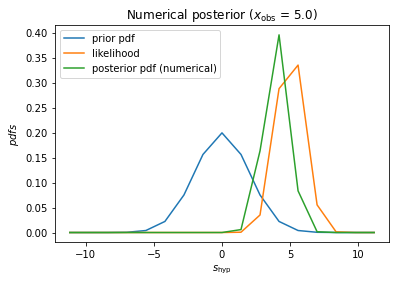

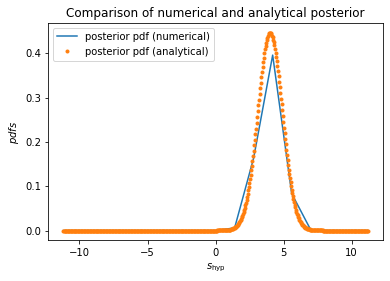

In [3]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt

print('a)')

mu_s = 0.
sigma_s = 2.
sigma = 1.
x_obs = 5.


def compute_grid_1d_gaussian(mu_s, sigma_s, sigma, N):
    """Compute a suitable 1-D grid for stimulus values, for a Gaussian prior and likelihood."""
    # total variance is prior variance plus measurement variance, we use this to set the bounds for the grid
    sigma_tot = np.sqrt(sigma_s**2 + sigma**2)
    lb = mu_s - 5*sigma_tot # lower bound
    ub = mu_s + 5*sigma_tot # upper bound
    s_grid = np.linspace(lb, ub, N)
    ds = s_grid[1] - s_grid[0] # grid spacing
    return s_grid, ds

def compute_posterior_1d(s_grid, prior_pdf, likelihood):
    """Given a prior and likelihood evaluated on a 1-D grid of stimulus values, compute numerical posterior."""
    ds = s_grid[1] - s_grid[0] # grid spacing
    protoposterior = prior_pdf * likelihood
    normalization_constant = sp.integrate.romb(protoposterior, dx=ds)
    posterior_pdf = protoposterior / normalization_constant    
    return posterior_pdf

def plot_distributions(s_grid, prior_pdf, likelihood, posterior_pdf, x_obs):
    """Plot distributions useful for this exercise."""
    plt.plot(s_grid, prior_pdf, label='prior pdf')
    plt.plot(s_grid, likelihood, label='likelihood')
    plt.plot(s_grid, posterior_pdf, label='posterior pdf (numerical)')
    plt.xlabel(r'$s_\mathrm{hyp}$')
    plt.ylabel(r'$pdfs$')
    plt.title(r'Numerical posterior ($x_\mathrm{obs}$ = ' + str(x_obs) + ')')
    plt.legend()
    plt.show()

N = int(2**9 + 1)
s_grid, ds = compute_grid_1d_gaussian(mu_s, sigma_s, sigma, N) # compute a grid of stimulus values
prior_pdf = sps.norm.pdf(s_grid, mu_s, sigma_s) # evaluate prior pdf on the grid
likelihood = sps.norm.pdf(s_grid, x_obs, sigma) # evaluate likelihood on the grid (for a fixed x_obs)
posterior_pdf = compute_posterior_1d(s_grid, prior_pdf, likelihood) # compute posterior
plot_distributions(s_grid, prior_pdf, likelihood, posterior_pdf, x_obs)

####################################################

print()
print('b)')

# Plot again the numerical posterior
plt.plot(s_grid, posterior_pdf, label='posterior pdf (numerical)')

# For the analytical posterior, we use the function defined in Exercise 2.2 (run that cell if needed)
mu_post, sigma_post = gaussian_posterior(mu_s, sigma_s, sigma, x_obs)
gaussian_posterior_pdf = sps.norm.pdf(s_grid, mu_post, sigma_post)
plt.plot(s_grid, gaussian_posterior_pdf, label='posterior pdf (analytical)', linestyle='',marker='.')

plt.xlabel(r'$s_\mathrm{hyp}$')
plt.ylabel(r'$pdfs$')
plt.title(r'Comparison of numerical and analytical posterior')
plt.legend()
plt.show()

# Compute root mean squared error (RMSE)
rmse = np.sqrt(sp.integrate.romb((posterior_pdf - gaussian_posterior_pdf)**2, dx=ds))
print('RMSE (root mean squared error) between numerical and analytical posterior: {}'.format(rmse))

####################################################

print()
print('c)')

# Compute mode, mean and standard deviation of the posterior numerically
mode_post = s_grid[np.argmax(posterior_pdf)] # not ideal as a method (why?), but good enough for now
mean_post = sp.integrate.romb(posterior_pdf * s_grid, dx=ds)
std_post = np.sqrt(sp.integrate.romb(posterior_pdf * s_grid**2, dx=ds) - mean_post**2)

print('Posterior mode. Numerical: {}. Analytical: {}.'.format(mode_post, mu_post))
print('Posterior mean. Numerical: {}. Analytical: {}.'.format(mean_post, mu_post))
print('Posterior standard deviation. Numerical: {}. Analytical: {}.'.format(std_post, sigma_post))



####################################################

print()
print('d)')

# Let's try again but with very few grid points
N = int(2**4 + 1)
s_grid_small, ds = compute_grid_1d_gaussian(mu_s, sigma_s, sigma, N) # compute a grid of stimulus values
prior_pdf = sps.norm.pdf(s_grid_small, mu_s, sigma_s) # evaluate prior pdf on the grid
likelihood = sps.norm.pdf(s_grid_small, x_obs, sigma) # evaluate likelihood on the grid (for a fixed x_obs)
posterior_pdf = compute_posterior_1d(s_grid_small, prior_pdf, likelihood) # compute posterior
plot_distributions(s_grid_small, prior_pdf, likelihood, posterior_pdf, x_obs)

plt.plot(s_grid_small, posterior_pdf, label='posterior pdf (numerical)')
posterior_analytical_pdf = sps.norm.pdf(s_grid, mu_post, sigma_post)
plt.plot(s_grid, posterior_analytical_pdf, label='posterior pdf (analytical)', linestyle='',marker='.')

plt.xlabel(r'$s_\mathrm{hyp}$')
plt.ylabel(r'$pdfs$')
plt.title(r'Comparison of numerical and analytical posterior')
plt.legend()
plt.show()


### Exercise 2.4: Numerical evaluation of a non-Gaussian posterior

> **Motivation:** We consider now a Bayesian observer model for which the posterior is not Gaussian, and cannot be computed analytically, so we will use the numerical methods we learnt in Exercise 2.3.

Consider now a bounded uniform prior $p(s) = \mathrm{Uniform}(s; a = -4, b = 4)$ (where $a$ and $b$ are the bounds) and Gaussian likelihood with $\sigma = 1$ and $x_\text{obs} = 5$. 

- a) Plot in the same graph the prior, the likelihood, and the posterior. What do you observe? *Hint:* You can use `scipy.stats.uniform.pdf` for the Uniform distribution. Note that `scipy.stats` has an unusual parameterization for the bounded uniform distribution that uses the left bound $a$ and the width (or scale), that is $b - a$.  
- b) Compute the mode, mean and standard deviation of the numerical posterior.

*Note*: For this exercise, you should be able to use the code you wrote in Exercise 2.3 with minimal changes (e.g., the lines with the definition of the prior). If not, rewrite your code in a way which is more easily reusable.

#### Exercise 2.4 Answers

- a) The bounded uniform prior here introduces a hard cutoff, which produces a highly asymmetric and non-Gaussian posterior.
- b) See below.

a)


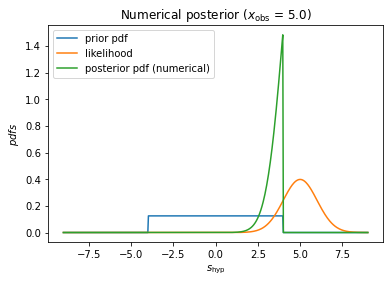


b)
Posterior mode: 3.97265625.
Posterior mean: 3.474013277879223.
Posterior standard deviation: 0.44588546129289097.


In [4]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt

print('a)')

a = -4.
b = 4.
sigma = 1.
x_obs = 5.

# Compute grid
N = int(2**9 + 1)
s_grid = np.linspace(a - 5*sigma, b + 5*sigma, N)
ds = s_grid[1] - s_grid[0]

# Compute prior and likelihood
prior_pdf = sps.uniform.pdf(s_grid, a, b-a)
likelihood = sps.norm.pdf(s_grid, x_obs, sigma)

# Compute and plot posterior and other distributions (use computer_posterior_1d from Exercise 2.3)
posterior_pdf = compute_posterior_1d(s_grid, prior_pdf, likelihood)
plot_distributions(s_grid, prior_pdf, likelihood, posterior_pdf, x_obs)

####################################################

print()
print('b)')

mode_post = s_grid[np.argmax(posterior_pdf)]
mean_post = sp.integrate.romb(posterior_pdf * s_grid, dx=ds)
std_post = np.sqrt(sp.integrate.romb(posterior_pdf * s_grid**2, dx=ds) - mean_post**2)

print('Posterior mode: {}.'.format(mode_post))
print('Posterior mean: {}.'.format(mean_post))
print('Posterior standard deviation: {}.'.format(std_post))